In [5]:
import pandas as pd
import matplotlib.pyplot as plt

ratings = pd.read_csv('movie_ratings.csv').set_index('Movie')

In [6]:
def ratings_scatter(movie1, movie2):
    x = ratings.T[movie1]
    y = ratings.T[movie2]
    n = list(ratings.T.index)

    fig, ax = plt.subplots()
    ax.scatter(x, y, s=0)
    fig.set_figwidth(12)
    fig.set_figheight(8)
    plt.title("Preference Space for "+ movie1 + " vs. " + movie2, fontsize=20)
    ax.set_xlabel(movie1, fontsize=16)
    ax.set_ylabel(movie2, fontsize=16) 

    for i, txt in enumerate(n):
        ax.annotate(txt, (x[i], y[i]), fontsize=12)

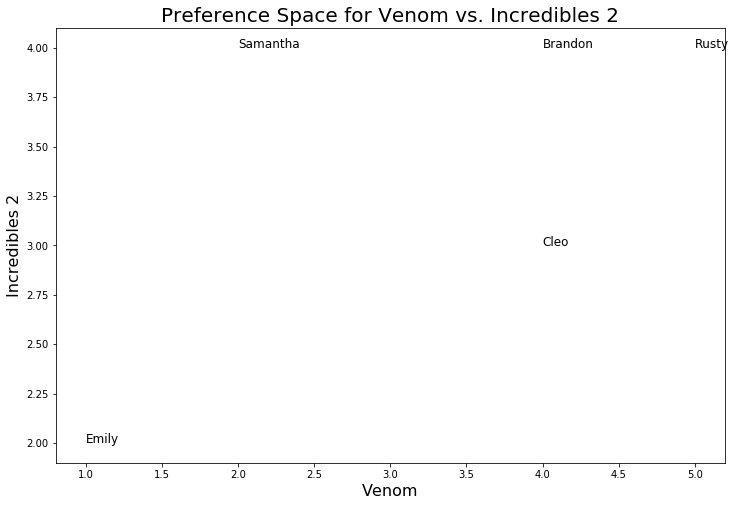

In [7]:
ratings_scatter('Venom', 'Incredibles 2')

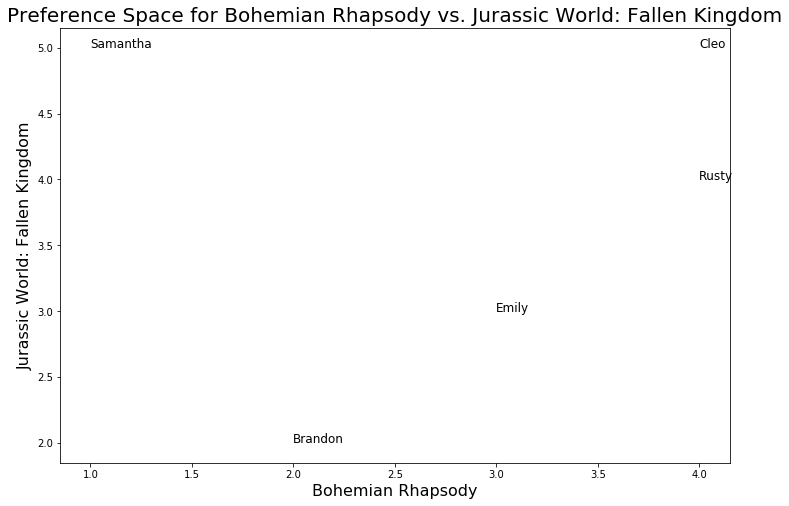

In [8]:
ratings_scatter('Bohemian Rhapsody', 'Jurassic World: Fallen Kingdom')

In [9]:
from scipy.spatial.distance import pdist, squareform

squareform(pdist(ratings.T, 'euclidean'))

array([[0.        , 6.63324958, 6.        , 7.41619849, 7.48331477],
       [6.63324958, 0.        , 6.92820323, 6.40312424, 5.09901951],
       [6.        , 6.92820323, 0.        , 5.56776436, 8.24621125],
       [7.41619849, 6.40312424, 5.56776436, 0.        , 6.70820393],
       [7.48331477, 5.09901951, 8.24621125, 6.70820393, 0.        ]])

In [10]:
distances = pd.DataFrame(1/(1 + squareform(pdist(ratings.T, 'euclidean'))), 
                         index=ratings.columns, columns=ratings.columns)

distances

,Brandon,Emily,Cleo,Rusty,Samantha
Brandon,1.000000,0.131006,0.142857,0.118818,0.117878
Emily,0.131006,1.000000,0.126132,0.135078,0.163961
Cleo,0.142857,0.126132,1.000000,0.152259,0.108152
Rusty,0.118818,0.135078,0.152259,1.000000,0.129732
Samantha,0.117878,0.163961,0.108152,0.129732,1.000000


In [11]:
tom = {'Aquaman': 2,
 'Avengers: Infinity War': 1,
 'Black Panther': 5,
 'Bohemian Rhapsody': 5,
 'Deadpool 2': 2,
 'Fantastic Beasts: The Crimes of Grindelwald': 3,
 'Incredibles 2': 3,
 'Jurassic World: Fallen Kingdom': 4,
 'Mission: Impossible вЂ“ Fallout': 3,
 'Venom': 3}

In [12]:
ratings['Tom'] = pd.Series(tom)

distances = pd.DataFrame(1 / (1 + squareform(pdist(ratings.T, 'euclidean'))), index = ratings.columns, columns = ratings.columns)

similarities = distances['Tom'].sort_values(ascending = False)[1:]
similarities

Brandon    NaN
Emily      NaN
Cleo       NaN
Rusty      NaN
Samantha   NaN
Name: Tom, dtype: float64

In [13]:
new_ratings = pd.read_csv('movie_ratings2.csv').set_index('Movie')

FileNotFoundError: [Errno 2] File b'movie_ratings2.csv' does not exist: b'movie_ratings2.csv'

In [ ]:
recommendations = new_ratings.copy()

In [ ]:
for name, score in dict(similarities).items():
    recommendations[name] = recommendations[name] * score

recommendations['Total'] = recommendations.sum(axis=1)
recommendations.sort_values('Total', ascending=False)

In [ ]:
distances = pd.DataFrame(1/(1 + squareform(pdist(ratings.T, 'cosine'))), 
                         index=ratings.columns, columns=ratings.columns)

similarities = distances['Tom'].sort_values(ascending=False)[1:]

recommendations = new_ratings.copy()

for name, score in dict(similarities).items():
    recommendations[name] = recommendations[name] * score
    
recommendations['Total'] = recommendations.sum(axis=1)
recommendations.sort_values('Total', ascending=False)